[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5, 18.75, 19.0, 19.25, 19.5, 19.75, 20.0, 20.25, 20.5, 20.75, 21.0, 21.25, 21.5, 21.75, 22.0, 22.25, 22.5, 22.75, 23.0, 23.25, 23.5, 23.75, 24.0, 24.25, 24.5, 24.75, 25.0, 25.25, 25.5, 25.75, 26.0, 26.25, 26.5, 26.75, 27.0, 27.25, 27.5, 27.75, 28.0, 28.25, 28.5, 28.75, 29.0, 29.25, 29.5, 29.75, 30.0, 30.25, 30.5, 30.75, 31.0, 31.25, 31.5, 31.75, 32.0, 32.25, 32.5, 32.75, 33.0, 33.25, 33.5, 33.75, 34.0, 34.25, 34.5, 34.75, 35.0, 35.25, 35.5, 35.75, 36.0, 36.25, 36.5, 36.75, 37.0, 37.25, 37.5, 37.75, 38.0, 38.25, 38.5, 38.75, 39.0, 39.25, 39.5, 39.75,

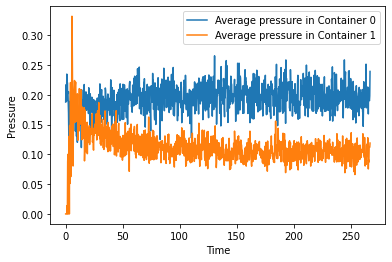

In [10]:
import matplotlib.pyplot as plt

#VARIABLES
delta_time = 0.25
L=0.03
file_path = '../Out500-500000-wallEvents-sep-0.09.txt'


latest_timestamp = 0
#Parse the .txt file
data = []  # Store the parsed data as (timestamp, velocity, container_id) tuples
with open(file_path, 'r') as file:
    lines = file.readlines()
    i = 0
    j = 0

    while i < len(lines):
        #print(lines[i])
        if j == 0 :
          readTimestamp = float(lines[i].strip())
          latest_timestamp = readTimestamp
          j = 1
        elif j == 1 :
          parts = lines[i].split()
          readVelocity = float(parts[0])
          readContainer_id = int(parts[1]) - 1
          data.append((readTimestamp, readVelocity, readContainer_id))
          j = 0

        i += 1


#Group data by container ID
container_data = {}
for timestamp, velocity, container_id in data:
    if container_id not in container_data:
        container_data[container_id] = []
    container_data[container_id].append((timestamp, velocity))

time_arrays = {}
steps = []
#Build time series
for container_id, container_values in container_data.items():
    timestamps, velocities = zip(*container_values)
    num_steps = int(latest_timestamp / delta_time)

    time_series = [(0.0) for i in range(num_steps)] #(i*delta_time, 0.0)
    steps = [(i*delta_time) for i in range(num_steps)] #build array with all time steps

    vertical_sides = 0
    if container_id == 1:
        vertical_sides = 0.09 + (0.09 - L)
    elif container_id == 2:
        vertical_sides = L

    index = int(timestamps[0] / delta_time)
    buffer = 0
    number = 0
    #mark = timestamps[0]
    for timestamp, velocity in zip(timestamps, velocities):
        new_index = int(timestamp / delta_time)
        if index != new_index:
            avg_vel = buffer / number  #avg velocities
            avg_p = avg_vel /(delta_time*(2*0.09 + vertical_sides)) #average pressure
            #time_series[index] = buffer / number #average pressure
            time_series[index] = (avg_p)
            number = 0
            index = new_index
            buffer = 0
            #mark = timestamp

        buffer = buffer + velocity
        number += 1
    #print("time series ", container_id, time_series)
    time_arrays[container_id] = time_series

print(steps)
print("CONTAINER ", 0, time_arrays[0])
plt.plot(steps[:len(time_arrays[0])], time_arrays[0], label=f'Average pressure in Container {0}')

print("CONTAINER ", 1, time_arrays[1])
plt.plot(steps[:len(time_arrays[1])], time_arrays[1], label=f'Average pressure in Container {1}')

plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()